## Table of Contents
<ul>
<li><a href="#data-cleaning--preprocessing">Data Cleaning & Preprocessing</a></li>
<li><a href="#exploratory-data-analysis">Exploratory Data Analysis</a></li>
<li><a href="#machine-learning">Machine Learning</a></li>
</ul>

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier , AdaBoostClassifier , GradientBoostingRegressor , BaggingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , StratifiedKFold
from imblearn.over_sampling import SMOTE , RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error as MSE, roc_auc_score ,precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier


### - Data overview

In [37]:
df = pd.read_csv("Heart_Dis_Data.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [38]:
df.shape

(319794, 18)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319794 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319794 non-null  object 
 1   BMI               319794 non-null  float64
 2   Smoking           319794 non-null  object 
 3   AlcoholDrinking   319794 non-null  object 
 4   Stroke            319794 non-null  object 
 5   PhysicalHealth    319794 non-null  int64  
 6   MentalHealth      319794 non-null  int64  
 7   DiffWalking       319794 non-null  object 
 8   Sex               319794 non-null  object 
 9   AgeCategory       319794 non-null  object 
 10  Race              319794 non-null  object 
 11  Diabetic          319794 non-null  object 
 12  PhysicalActivity  319794 non-null  object 
 13  GenHealth         319794 non-null  object 
 14  SleepTime         319794 non-null  int64  
 15  Asthma            319794 non-null  object 
 16  KidneyDisease     31

## Data Cleaning & Preprocessing

### - Check for nulls

In [40]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### - Check for duplicates

In [41]:
print(f"The number of duplicated rows is : {df.duplicated().sum()}")

The number of duplicated rows is : 18078


##### - Drop  duplicates

In [42]:
df.drop_duplicates(inplace=True)
print(f"The number of duplicated values is : {df.duplicated().sum()}")

The number of duplicated values is : 0


### - Drop unimportant columns

In [43]:
df.drop(columns=['SkinCancer', 'Race'], inplace=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,No,Yes,Very good,7,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,Yes,Yes,Fair,8,Yes,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,No,No,Good,6,No,No
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,No,Yes,Very good,8,No,No


### - Handle Outliers

#### - Draw a box plot for all numerical values to detect outliers


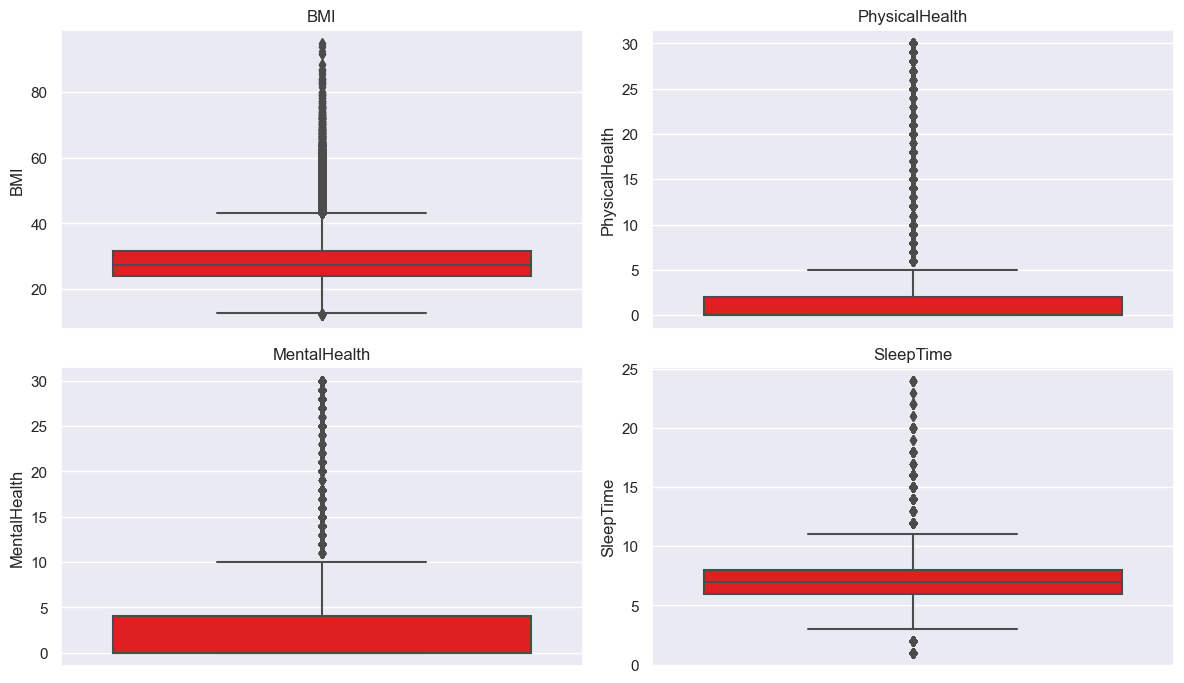

In [44]:
numeric_df = df.select_dtypes(include=['number'])
numerical_cols = numeric_df.columns
num_vars = len(numeric_df.columns)
num_cols = 2
num_rows = 2  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 7))
axes = axes.flatten()

# Generate box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i] , color = "Red")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#### - Fix outliers issue for BMI
##### - After Google search we found that realistic BMI range: 10–60 kg/m²


In [45]:
df = df[(df["BMI"] >= 10) & (df["BMI"] <= 60)]

Text(0.5, 1.0, 'BMI')

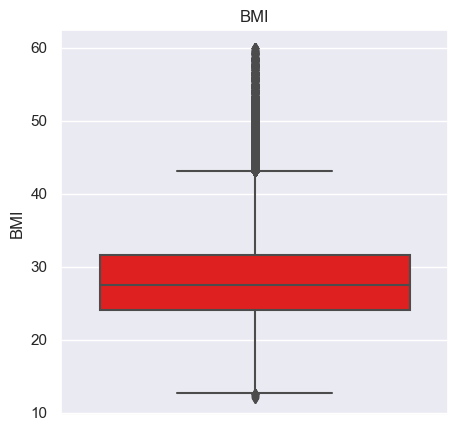

In [46]:
plt.figure(figsize=(5 , 5))
sns.boxplot(y=df["BMI"], color = "Red")
plt.title("BMI")

#### - Hanlde outliers for Sleep time

In [47]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
Q1 = df["SleepTime"].quantile(0.25)
Q3 = df["SleepTime"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df["SleepTime"] >= lower_bound) & (df["SleepTime"] <= upper_bound)]

Text(0.5, 1.0, 'Sleep time')

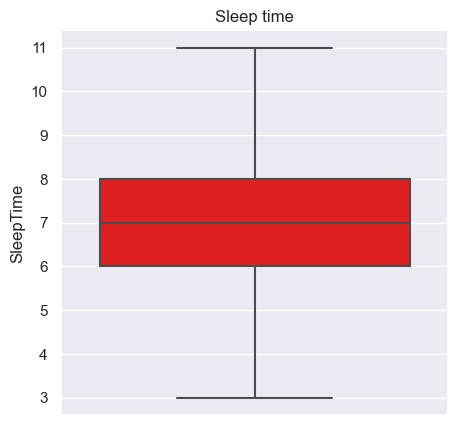

In [48]:
plt.figure(figsize=(5 , 5))
sns.boxplot(y=df["SleepTime"], color = "Red")
plt.title("Sleep time")

### - Maping

In [49]:
df_preproccesed = df.copy()

#### - Map column AgeCategory

In [50]:
df_preproccesed["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [51]:
# Define an ordered mapping
age_mapping = {
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, 
    '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10,
    '70-74': 11, '75-79': 12, '80 or older': 13
}

# Apply mapping
df_preproccesed['AgeCategory'] = df_preproccesed['AgeCategory'].map(age_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,No,Yes,Very good,7,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,Yes,Yes,Fair,8,Yes,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,No,No,Good,6,No,No
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,No,Yes,Very good,8,No,No


#### - Map column GenHealth

In [52]:
df_preproccesed["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [53]:
# Define an ordered mapping
GenHealth_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

# Apply mapping
df_preproccesed['GenHealth'] = df_preproccesed['GenHealth'].map(GenHealth_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,No,Yes,Very good,7,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,Yes,Yes,Fair,8,Yes,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,No,No,Good,6,No,No
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,No,Yes,Very good,8,No,No


#### - Map column Sex

In [54]:
df_preproccesed["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [55]:
# Define an ordered mapping
Sex_mapping = {
    'Female': 0,
    'Male': 1,
}
# Apply mapping
df_preproccesed['Sex'] = df_preproccesed['Sex'].map(Sex_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,No,Yes,Very good,7,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,Yes,Yes,Fair,8,Yes,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,No,No,Good,6,No,No
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,No,Yes,Very good,8,No,No


#### - Map Binary columns

##### - Diabetic has special values

In [56]:
df["Diabetic"].value_counts()

No                         248197
Yes                         39328
No, borderline diabetes      6650
Yes (during pregnancy)       2530
Name: Diabetic, dtype: int64

In [57]:
# Define an ordered mapping
binary_mapping = {
    'Yes': 1,
    'No': 0,
    'No, borderline diabetes': 0.5,
    'Yes (during pregnancy)': 1
}

# Apply mapping
binary_df = df_preproccesed.select_dtypes(include=['object'])

for col in binary_df.columns:
    df_preproccesed[col] = df_preproccesed[col].map(binary_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,No,Yes,Very good,7,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,Yes,Yes,Fair,8,Yes,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,No,No,Good,6,No,No
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,No,Yes,Very good,8,No,No


### Standardization

#### - Let's standardize our numerical values to get meaningful results

In [58]:
numerical_cols = (df_preproccesed.select_dtypes(include=['number'])).columns
df_preproccesed_std = (df_preproccesed[numerical_cols] - df_preproccesed[numerical_cols].min()) / (df_preproccesed[numerical_cols].max() - df_preproccesed[numerical_cols].min())
df_preproccesed_std.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,0.0,0.095516,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,1.0,0.75,0.250,1.0,0.0
1,0.0,0.173514,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,0.0,1.0,0.75,0.500,0.0,0.0
2,0.0,0.303650,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,1.0,0.25,0.625,1.0,0.0
3,0.0,0.254223,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,0.0,0.0,0.50,0.375,0.0,0.0
4,0.0,0.243796,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,0.0,1.0,0.75,0.625,0.0,0.0


## Exploratory Data Analysis

In [59]:
colors = ['#fcbba1', '#fc9272', '#fb6a4a', '#ef3b2c', '#cb181d', '#a50f15', '#67000d']   # define color pallete

### - 📊 Explore correlations

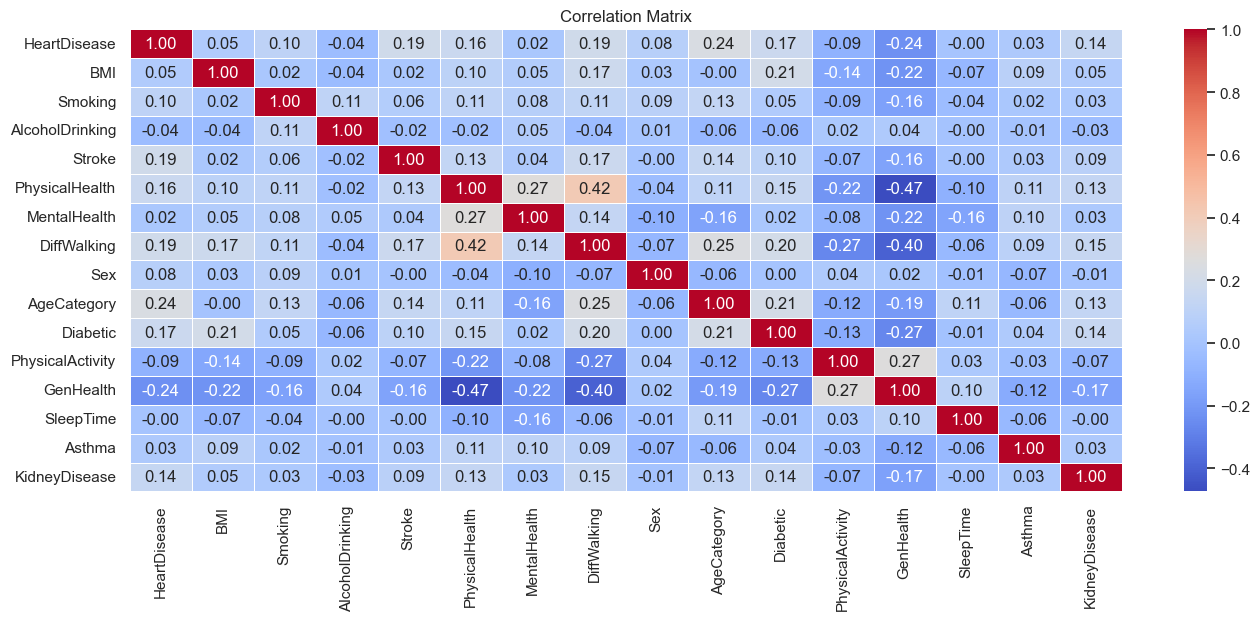

In [60]:
# Compute correlation matrix
corr_matrix = df_preproccesed_std.corr()

# Plot heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.savefig("corr.png", dpi=300, bbox_inches='tight')
# Show plot
plt.title("Correlation Matrix")
plt.show()

### 📊 BMI distribution

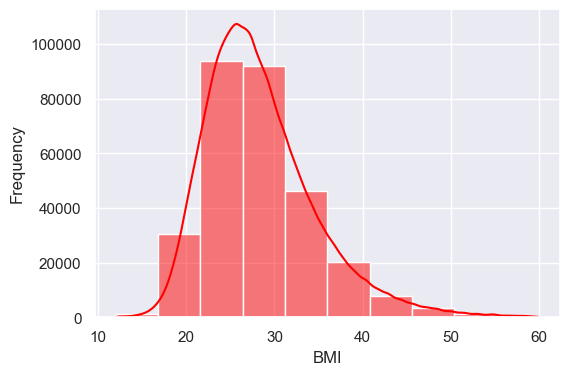

In [61]:
plt.figure(figsize=(6, 4))
sns.histplot(df["BMI"], bins = 10, kde=True ,  color = "Red")
# Labels and title
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.savefig("BMI_dist.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

### 📊 Age category VS BMI

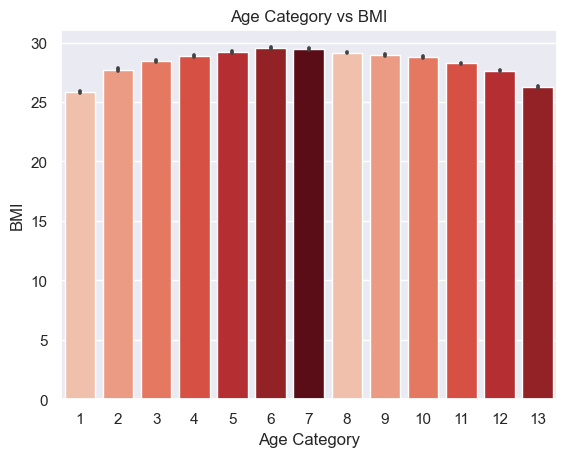

In [62]:
# Create the bar plot with sorted hues
sns.barplot(x="AgeCategory", y="BMI",
            data=df_preproccesed , palette = colors)

# Labels and formatting
plt.xlabel("Age Category")
plt.ylabel("BMI")
plt.title("Age Category vs BMI")
plt.savefig("Age Category vs BMI.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

#### 📝 Insight : As peaple grown up they have higher propabiblity to gain more weight.

### 📊 Age category VS Heart disease

In [63]:
# Define an ordered mapping
age_mapping = {
    '18-24': 'Young-Adult', '25-29': 'Young-Adult', '30-34': 'Young-Adult', '35-39': 'Young-Adult',
    '40-44': 'Middle-Adult', '45-49': 'Middle-Adult', '50-54': 'Middle-Adult',
    '55-59': 'Middle-Adult', '60-64': 'Old-Adult', '65-69': 'Old-Adult',
    '70-74': 'Old-Adult', '75-79': 'Elderly', '80 or older': 'Elderly'
}

# Apply mapping
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,3,30,No,Female,Middle-Adult,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,0,0,No,Female,Elderly,No,Yes,Very good,7,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,Old-Adult,Yes,Yes,Fair,8,Yes,No
3,No,24.21,No,No,No,0,0,No,Female,Elderly,No,No,Good,6,No,No
4,No,23.71,No,No,No,28,0,Yes,Female,Middle-Adult,No,Yes,Very good,8,No,No


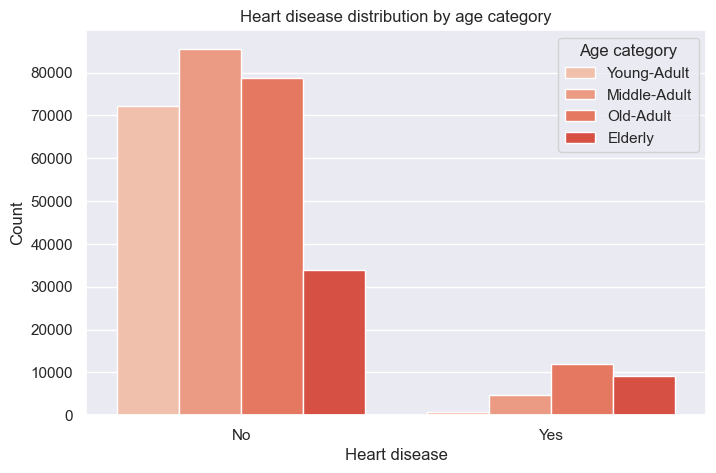

In [64]:
AgeCategory_counts = df.groupby(["HeartDisease", "AgeCategory"]).size().reset_index(name="Count")

age_colors = {
    "Young-Adult": colors[0],  
    "Middle-Adult": colors[1],  
    "Old-Adult": colors[2],  
    "Elderly": colors[3]  
}

hue_order = list(age_colors.keys())

plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="AgeCategory",hue_order = hue_order, data=AgeCategory_counts, palette=colors)

# Labels and formatting
plt.xlabel("Heart disease")
plt.ylabel("Count")
plt.title("Heart disease distribution by age category")
plt.legend(title="Age category")
plt.savefig("Age Category.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

#### 📝 Insight : Older peaple have more probability to have Heart disease

### 📊 Sex VS Heart disease

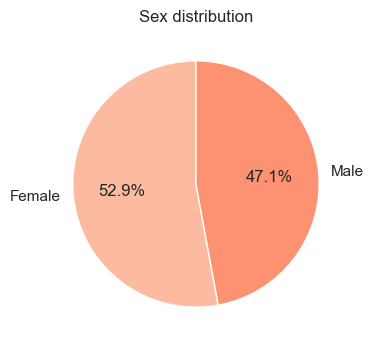

In [65]:
# Sex Distribution
Sex_distribution = df["Sex"].value_counts()
plt.figure(figsize=(4 , 4))
plt.pie(Sex_distribution.values , labels = Sex_distribution.index , autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Sex distribution")
plt.savefig("SEX_dist.png", dpi=300, bbox_inches='tight')
plt.show()

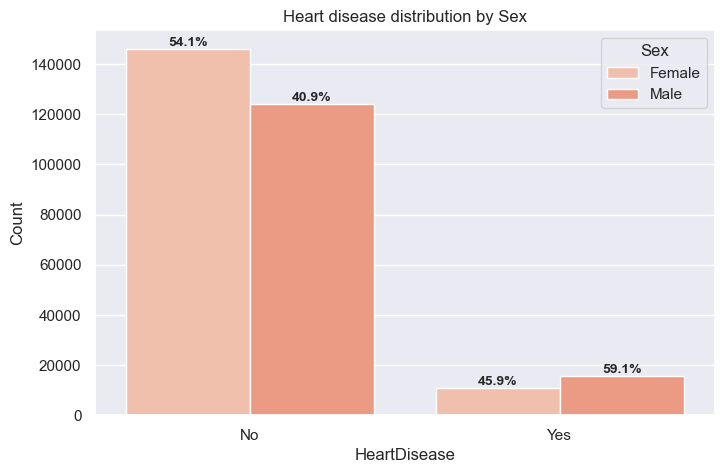

In [66]:
# Sex VS HeartDisease
Sex_counts = df.groupby(["HeartDisease", "Sex"]).size().reset_index(name="Count")

# Calculate total count per HeartDisease category for percentage calculation
total_per_heart = Sex_counts.groupby("HeartDisease")["Count"].transform("sum")
Sex_counts["Percent"] = (Sex_counts["Count"] / total_per_heart) * 100

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x="HeartDisease", y="Count", hue="Sex", data=Sex_counts, palette=colors)

# Add percentage labels on top of each bar
for i in range(len(Sex_counts)):
    row = Sex_counts.iloc[i]
    bar = barplot.patches[i]
    height = bar.get_height()
    barplot.text(bar.get_x() + bar.get_width() / 2,height + 0.5,f'{row["Percent"]:.1f}%',ha='center',va='bottom',fontsize=10, fontweight='bold')
    
# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Sex")
plt.legend(title="Sex")
plt.savefig("SEX.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

#### 📝 Insight : Males have more propability to have heart disease

### 📊 Smoking VS Heart disease

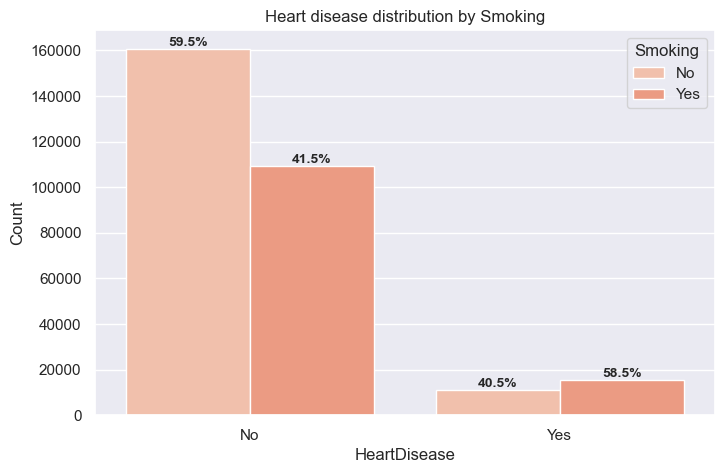

In [67]:
smoking_counts = df.groupby(["HeartDisease", "Smoking"]).size().reset_index(name="Count")

# Calculate total count per HeartDisease category for percentage calculation
total_per_heart = smoking_counts.groupby("HeartDisease")["Count"].transform("sum")
smoking_counts["Percent"] = (smoking_counts["Count"] / total_per_heart) * 100

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x="HeartDisease", y="Count", hue="Smoking", data=smoking_counts, palette=colors)

# Add percentage labels on top of each bar
for i in range(len(smoking_counts)):
    row = smoking_counts.iloc[i]
    bar = barplot.patches[i]
    height = bar.get_height()
    barplot.text(bar.get_x() + bar.get_width() / 2,height + 0.5,f'{row["Percent"]:.1f}%',ha='center',va='bottom',fontsize=10, fontweight='bold')
# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Smoking")
plt.legend(title="Smoking")
plt.savefig("Smoking.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

#### 📝 Insight : Smokers have more propability to have heart disease

### 📊 Alcohol drinking VS Heart disease

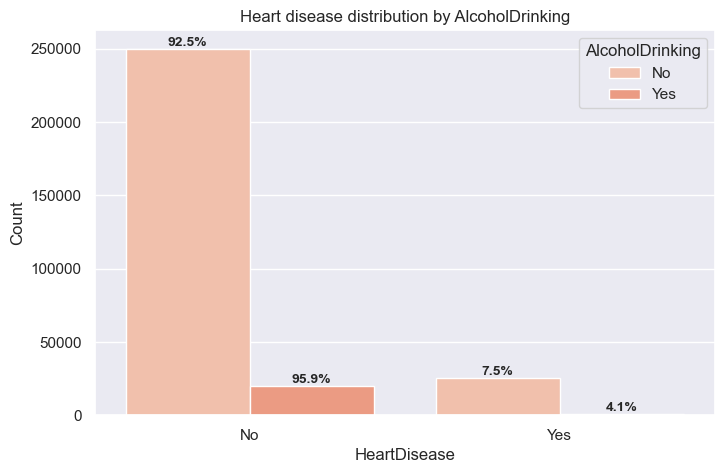

In [68]:
AlcoholDrinking_counts = df.groupby(["HeartDisease", "AlcoholDrinking"]).size().reset_index(name="Count")

# Calculate total count per HeartDisease category for percentage calculation
total_per_heart = AlcoholDrinking_counts.groupby("HeartDisease")["Count"].transform("sum")
AlcoholDrinking_counts["Percent"] = (AlcoholDrinking_counts["Count"] / total_per_heart) * 100

plt.figure(figsize=(8, 5))
barplot= bar_plot = sns.barplot(x="HeartDisease", y="Count", hue="AlcoholDrinking", data=AlcoholDrinking_counts, palette=colors)

# Add percentage labels on top of each bar
for i in range(len(AlcoholDrinking_counts)):
    row = AlcoholDrinking_counts.iloc[i]
    bar = barplot.patches[i]
    height = bar.get_height()
    barplot.text(bar.get_x() + bar.get_width() / 2,height + 0.5,f'{row["Percent"]:.1f}%',ha='center',va='bottom',fontsize=10, fontweight='bold')
    
# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by AlcoholDrinking")
plt.legend(title="AlcoholDrinking")
plt.savefig("Alcohol.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

#### 📝 Insight : Alcohol hasn't significant impact on having heart disease

### 📊 Stroke VS Heart disease

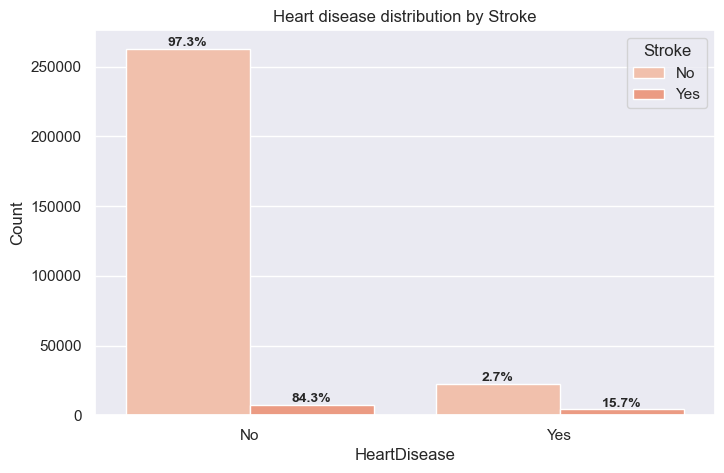

In [69]:
Stroke_counts = df.groupby(["HeartDisease", "Stroke"]).size().reset_index(name="Count")

# Calculate total count per HeartDisease category for percentage calculation
total_per_heart = Stroke_counts.groupby("HeartDisease")["Count"].transform("sum")
Stroke_counts["Percent"] = (Stroke_counts["Count"] / total_per_heart) * 100

plt.figure(figsize=(8, 5))
barplot= bar_plot = sns.barplot(x="HeartDisease", y="Count", hue="Stroke", data=Stroke_counts, palette=colors)

# Add percentage labels on top of each bar
for i in range(len(Stroke_counts)):
    row = Stroke_counts.iloc[i]
    bar = barplot.patches[i]
    height = bar.get_height()
    barplot.text(bar.get_x() + bar.get_width() / 2,height + 0.5,f'{row["Percent"]:.1f}%',ha='center',va='bottom',fontsize=10, fontweight='bold')


# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Stroke")
plt.legend(title="Stroke")
plt.savefig("Stroke.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

#### 📝 Insight : Strokes hasn't significant impact on having heart disease

### 📊 Diabetic VS Heart disease

In [70]:
df["Diabetic"].value_counts()


No                         248197
Yes                         39328
No, borderline diabetes      6650
Yes (during pregnancy)       2530
Name: Diabetic, dtype: int64

#### - Keep olny Yes and No because the remaining have low no. of records


In [71]:
df = df[(df["Diabetic"] == "Yes") | (df["Diabetic"] == "No")]

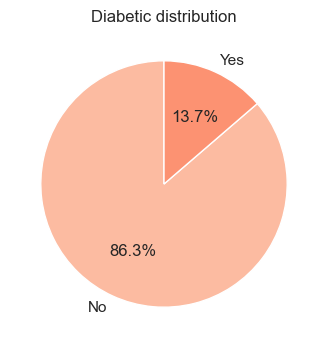

In [72]:
# Diabetic Distribution
Diabetic_distribution = df["Diabetic"].value_counts()
plt.figure(figsize=(4 , 4))
plt.pie(Diabetic_distribution.values , labels = Diabetic_distribution.index , autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Diabetic distribution")
plt.savefig("Diabetic_dist.png", dpi=300, bbox_inches='tight')
plt.show()

#### - Most of our data aran't Diabetic peaple

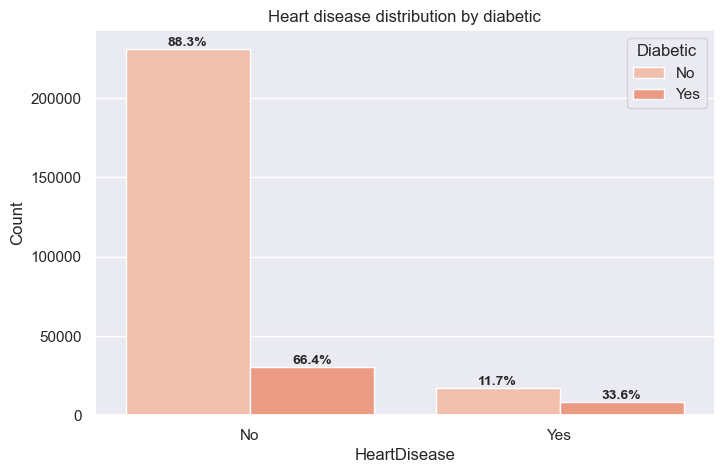

In [73]:
Diabetic_counts = pd.DataFrame(df.groupby(["HeartDisease", "Diabetic"]).size().reset_index(name="Count"))

# Calculate total count per HeartDisease category for percentage calculation
total_per_heart = Diabetic_counts.groupby("HeartDisease")["Count"].transform("sum")
Diabetic_counts["Percent"] = (Diabetic_counts["Count"] / total_per_heart) * 100

plt.figure(figsize=(8, 5))
barplot= bar_plot = sns.barplot(x="HeartDisease", y="Count", hue="Diabetic", data=Diabetic_counts, palette=colors)

# Add percentage labels on top of each bar
for i in range(len(Diabetic_counts)):
    row = Diabetic_counts.iloc[i]
    bar = barplot.patches[i]
    height = bar.get_height()
    barplot.text(bar.get_x() + bar.get_width() / 2,height + 0.5,f'{row["Percent"]:.1f}%',ha='center',va='bottom',fontsize=10, fontweight='bold')
# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by diabetic")
plt.legend(title="Diabetic")
plt.savefig("Diabetic.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

#### 📝 Insight : Diabetes hasn't significant impact on having heart disease

### 📊 General health VS Heart disease

In [74]:
df['GenHealth'].value_counts()

Very good    100849
Good          86527
Excellent     57907
Fair          32144
Poor          10098
Name: GenHealth, dtype: int64

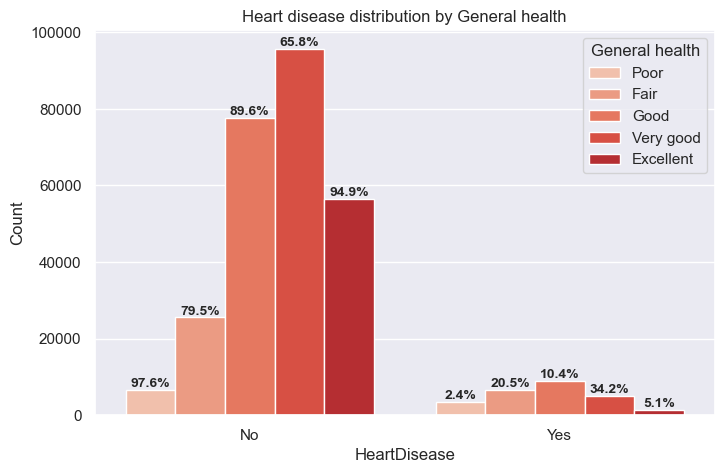

In [75]:
GenHealth_counts = df.groupby(["GenHealth", "HeartDisease"]).size().reset_index(name="Count")

GenHealth_colors = {
    "Poor": colors[0],  
    "Fair": colors[1],  
    "Good": colors[2],  
    "Very good": colors[3],
    "Excellent": colors[4]
}
# Define the order of AgeCategory as per the colors dictionary
hue_order = list(GenHealth_colors.keys())

# Total per GenHealth group
total_per_health = GenHealth_counts.groupby("GenHealth")["Count"].transform("sum")

# Compute percentage within each GenHealth group
GenHealth_counts["Percent"] = (GenHealth_counts["Count"] / total_per_health) * 100

plt.figure(figsize=(8, 5))
barplot= bar_plot = sns.barplot(x="HeartDisease", y="Count", hue="GenHealth",hue_order = hue_order, data=GenHealth_counts, palette=colors)

# Add percentage labels on top of each bar
for i in range(len(GenHealth_counts)):
    row = GenHealth_counts.iloc[i]
    bar = barplot.patches[i]
    height = bar.get_height()
    barplot.text(bar.get_x() + bar.get_width() / 2,height + 0.5,f'{row["Percent"]:.1f}%',ha='center',va='bottom',fontsize=10, fontweight='bold')

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by General health")
plt.legend(title="General health")
plt.savefig("General health.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

#### 📝 Insight : The lower General health the higher propability to have heart disease

### 📊 Sleep quality VS Heart disease

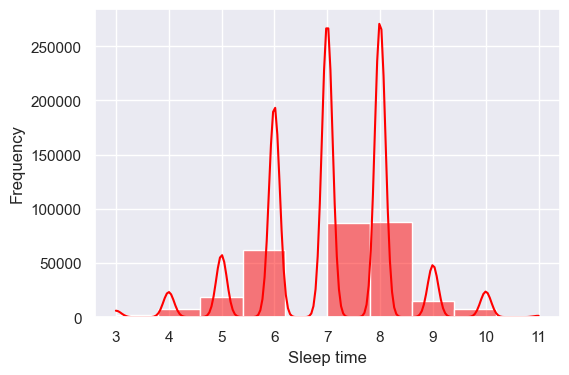

In [76]:
plt.figure(figsize=(6, 4))
sns.histplot(df["SleepTime"], bins = 10, kde=True ,  color = "Red")
# Labels and title
plt.xlabel("Sleep time")
plt.ylabel("Frequency")
plt.savefig("Sleep_dist.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [77]:
df['SleepTime_cat'] = pd.cut(df['SleepTime'],
                                bins=[0, 4, 6, 9, df['SleepTime'].max()],
                                labels=['Severely Sleep', 'Short Sleep', 'Normal Sleep', 'Long Sleep'])

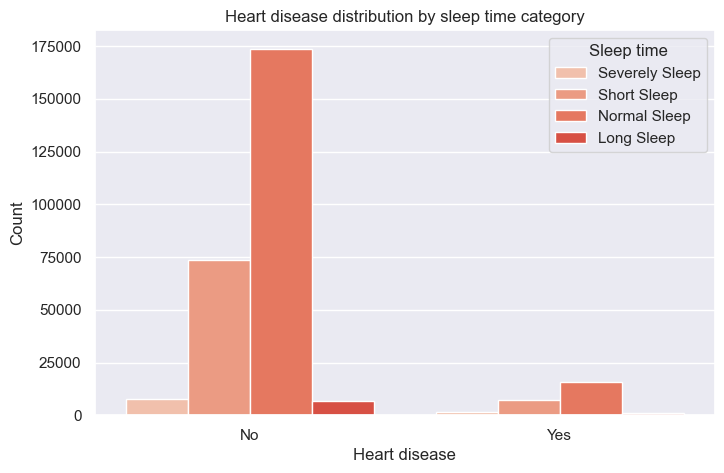

In [78]:
SleepTime_cat_counts = df.groupby(["HeartDisease", "SleepTime_cat"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))

SleepTime_cat_colors = {
    "Severely Sleep": colors[0],  
    "Short Sleep": colors[1],  
    "Normal Sleep": colors[2],  
    "Long Sleep": colors[3]  
}
# Define the order of AgeCategory as per the colors dictionary
hue_order = list(SleepTime_cat_colors.keys())

# Create the bar plot with sorted hues
sns.barplot(x="HeartDisease", y="Count", hue="SleepTime_cat", 
            data=SleepTime_cat_counts, palette=SleepTime_cat_colors, hue_order=hue_order)

# Labels and formatting
plt.xlabel("Heart disease")
plt.ylabel("Count")
plt.title("Heart disease distribution by sleep time category")
plt.legend(title="Sleep time")
plt.savefig("Sleep.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

#### 📝 Insight : Peaple with good sleep quality have more propabiblity to haven't heart disease

## Machine Learning

In [106]:
df_preproccesed_std.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,0.0,0.095516,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,1.0,0.75,0.250,1.0,0.0
1,0.0,0.173514,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,0.0,1.0,0.75,0.500,0.0,0.0
2,0.0,0.303650,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,1.0,0.25,0.625,1.0,0.0
3,0.0,0.254223,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,0.0,0.0,0.50,0.375,0.0,0.0
4,0.0,0.243796,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,0.0,1.0,0.75,0.625,0.0,0.0


In [107]:
X = df_preproccesed_std.iloc[:,1:]
y = df_preproccesed_std.iloc[:,0]


In [108]:
SEED = 42  # or any integer seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y,random_state=42)

### - Train model (before resamling)

In [109]:
lr = LogisticRegression(random_state=SEED)

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'max_iter': [100, 200]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

grid_search_lr_br = GridSearchCV(estimator = lr, param_grid=param_grid, scoring='roc_auc', cv= cv , n_jobs= -1)

grid_search_lr_br.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='roc_auc')

In [110]:
best_model_lr_br = grid_search_lr_br.best_estimator_
y_pred_lr_br_test = best_model_lr_br.predict(X_test)
y_pred_lr_br_train = best_model_lr_br.predict(X_train)
y_proba_lr_br = best_model_lr_br.predict_proba(X_test)[:, 1]
confusion_matrix_lr_br = confusion_matrix(y_test, y_pred_lr_br_test)
classification_report_lr_br = classification_report(y_test, y_pred_lr_br_test)
best_score_lr_br = grid_search_lr_br.best_score_
accuracy_lr_br_test = accuracy_score(y_test, y_pred_lr_br_test)
accuracy_lr_br_train = accuracy_score(y_train, y_pred_lr_br_train)
mse_lr_br = MSE(y_test, y_pred_lr_br_test)**0.5
precision_lr_br = precision_score(y_test, y_pred_lr_br_test)
recall_score_lr_br = recall_score(y_test, y_pred_lr_br_test)
f1_score_lr_br = f1_score(y_test, y_pred_lr_br_test)
best_params_lr_br = grid_search_lr_br.best_params_

In [111]:
print('Model : Logistic Regression Classifier (before resampling)')
print("______________________________________________________________")
print('ROC AUC (Test): {:.3f} |Best CV ROC AUC (Train): {:.3f} | Accuracy (test): {:.3f} | Accuracy (train): {:.3f} | RMSE: {:.3f}'.format(roc_auc_score(y_test, y_proba_lr_br)
        , best_score_lr_br ,accuracy_lr_br_test ,accuracy_lr_br_test, mse_lr_br ))
print('Precision: {:.3f} | Recall: {:.3f} | F1-Score: {:.3f}'.format(
    precision_lr_br , recall_score_lr_br, f1_score_lr_br))
print("______________________________________________________________")
print('Best Params:', best_params_lr_br)
print("_______________________________________________________________")
print('Confusion Matrix:\n', confusion_matrix_lr_br)
print("______________________________________________________________")
print('Classification Report:\n', classification_report_lr_br)

Model : Logistic Regression Classifier (before resampling)
______________________________________________________________
ROC AUC (Test): 0.838 |Best CV ROC AUC (Train): 0.835 | Accuracy (test): 0.912 | Accuracy (train): 0.912 | RMSE: 0.297
Precision: 0.521 | Recall: 0.100 | F1-Score: 0.168
______________________________________________________________
Best Params: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
_______________________________________________________________
Confusion Matrix:
 [[53565   488]
 [ 4757   531]]
______________________________________________________________
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     54053
         1.0       0.52      0.10      0.17      5288

    accuracy                           0.91     59341
   macro avg       0.72      0.55      0.56     59341
weighted avg       0.88      0.91      0.88     59341



### - Imbalance class

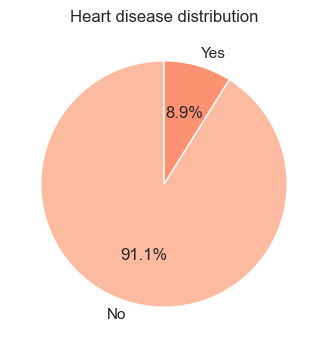

In [112]:
# HeartDisease Distribution
HeartDisease_distribution = df["HeartDisease"].value_counts()
plt.figure(figsize=(4 , 4))
plt.pie(HeartDisease_distribution.values , labels = HeartDisease_distribution.index , autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Heart disease distribution")
plt.savefig("HeartDisease.png", dpi=300, bbox_inches='tight')
plt.show()

#### - Oversample the minority class

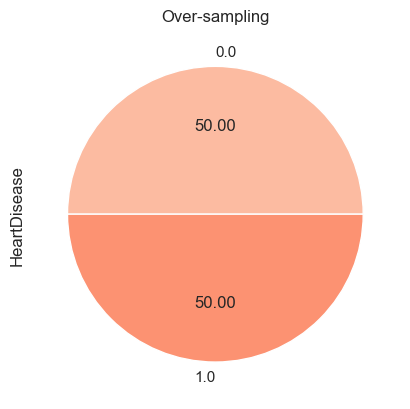

In [113]:
ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f', colors = colors)
_ = ax.set_title("Over-sampling")

In [114]:
SEED = 42  # or any integer seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify= y_res,random_state=42)

### - Train model (after resamling)

###  Logistic regression

In [115]:
lr = LogisticRegression(random_state=SEED)

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'max_iter': [100, 200]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

grid_search_lr = GridSearchCV(estimator = lr, param_grid=param_grid, scoring='roc_auc', cv= cv , n_jobs= -1)

grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='roc_auc')

In [116]:
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr_test = best_model_lr.predict(X_test)
y_pred_lr_train = best_model_lr.predict(X_train)
y_proba_lr = best_model_lr.predict_proba(X_test)[:, 1]
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr_test)
classification_report_lr = classification_report(y_test, y_pred_lr_test)
best_score_lr = grid_search_lr.best_score_
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
mse_lr = MSE(y_test, y_pred_lr_test)**0.5
precision_lr = precision_score(y_test, y_pred_lr_test)
recall_score_lr = recall_score(y_test, y_pred_lr_test)
f1_score_lr = f1_score(y_test, y_pred_lr_test)
best_params_lr = grid_search_lr.best_params_

In [117]:
print('Model : Logistic Regression (after resampling)')
print("______________________________________________________________")
print('ROC AUC (Test): {:.3f} |Best CV ROC AUC (Train): {:.3f} | Accuracy (test): {:.3f} | Accuracy (train): {:.3f} | RMSE: {:.3f}'.format(roc_auc_score(y_test, y_proba_lr)
        , best_score_lr ,accuracy_lr_test ,accuracy_lr_train, mse_lr ))
print('Precision: {:.3f} | Recall: {:.3f} | F1-Score: {:.3f}'.format(
    precision_lr , recall_score_lr, f1_score_lr))
print("______________________________________________________________")
print('Best Params:', best_params_lr)
print("_______________________________________________________________")
print('Confusion Matrix:\n', confusion_matrix_lr)
print("______________________________________________________________")
print('Classification Report:\n', classification_report_lr)

Model : Logistic Regression (after resampling)
______________________________________________________________
ROC AUC (Test): 0.834 |Best CV ROC AUC (Train): 0.836 | Accuracy (test): 0.758 | Accuracy (train): 0.759 | RMSE: 0.492
Precision: 0.747 | Recall: 0.780 | F1-Score: 0.763
______________________________________________________________
Best Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
_______________________________________________________________
Confusion Matrix:
 [[39782 14272]
 [11877 42176]]
______________________________________________________________
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.74      0.75     54054
         1.0       0.75      0.78      0.76     54053

    accuracy                           0.76    108107
   macro avg       0.76      0.76      0.76    108107
weighted avg       0.76      0.76      0.76    108107



### Random forest

In [118]:
rf = RandomForestClassifier(class_weight='balanced', random_state=SEED)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(estimator = rf, param_grid=param_grid, scoring='roc_auc', cv= 5 , n_jobs= -1)

grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring='roc_auc')

In [98]:
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf_test = best_model_rf.predict(X_test)
y_pred_rf_train = best_model_rf.predict(X_train)
y_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf_test)
classification_report_rf = classification_report(y_test, y_pred_rf_test)
best_score_rf = grid_search_rf.best_score_
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
mse_rf = MSE(y_test, y_pred_rf_test)**0.5
precision_rf = precision_score(y_test, y_pred_rf_test)
recall_score_rf = recall_score(y_test, y_pred_rf_test)
f1_score_rf = f1_score(y_test, y_pred_rf_test)
best_params_rf = grid_search_rf.best_params_

In [120]:
print('Model : Random Forest Classifier (after resampling)')
print("______________________________________________________________")
print('ROC AUC (Test): {:.3f} |Best CV ROC AUC (Train): {:.3f} | Accuracy (test): {:.3f} | Accuracy (train): {:.3f} | RMSE: {:.3f}'.format(roc_auc_score(y_test, y_proba_rf)
        , best_score_rf ,accuracy_rf_test ,accuracy_rf_train, mse_rf ))
print('Precision: {:.3f} | Recall: {:.3f} | F1-Score: {:.3f}'.format(
    precision_rf , recall_score_rf, f1_score_rf))
print("______________________________________________________________")
print('Best Params:', best_params_rf)
print("_______________________________________________________________")
print('Confusion Matrix:\n', confusion_matrix_rf)
print("______________________________________________________________")
print('Classification Report:\n', classification_report_rf)

Model : Random Forest Classifier (after resampling)
______________________________________________________________
ROC AUC (Test): 0.846 |Best CV ROC AUC (Train): 0.847 | Accuracy (test): 0.768 | Accuracy (train): 0.770 | RMSE: 0.481
Precision: 0.742 | Recall: 0.823 | F1-Score: 0.780
______________________________________________________________
Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
_______________________________________________________________
Confusion Matrix:
 [[38613 15441]
 [ 9588 44465]]
______________________________________________________________
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.71      0.76     54054
         1.0       0.74      0.82      0.78     54053

    accuracy                           0.77    108107
   macro avg       0.77      0.77      0.77    108107
weighted avg       0.77      0.77      0.77    108107



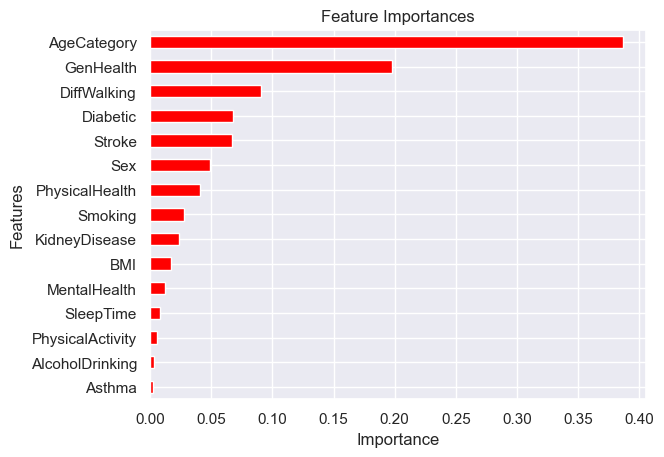

In [121]:
importances = best_model_rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=True)
sorted_importances.plot(kind='barh', color='red')

# Display the plot
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### XGBoost Classifier

In [122]:
xgb = XGBClassifier(eval_metric='logloss', random_state=SEED)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

grid_search_xg = GridSearchCV(estimator = xgb, param_grid=param_grid, scoring='roc_auc', cv= cv , n_jobs= -1)

grid_search_xg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                

In [123]:
best_model_xg = grid_search_xg.best_estimator_
y_pred_xg_test = best_model_xg.predict(X_test)
y_pred_xg_train = best_model_xg.predict(X_train)
y_proba_xg = best_model_xg.predict_proba(X_test)[:, 1]
confusion_matrix_xg = confusion_matrix(y_test, y_pred_xg_test)
classification_report_xg = classification_report(y_test, y_pred_xg_test)
best_score_xg = grid_search_xg.best_score_
accuracy_xg_test = accuracy_score(y_test, y_pred_xg_test)
accuracy_xg_train = accuracy_score(y_train, y_pred_xg_train)
mse_xg = MSE(y_test, y_pred_xg_test)**0.5
precision_xg = precision_score(y_test, y_pred_xg_test)
recall_score_xg = recall_score(y_test, y_pred_xg_test)
f1_score_xg = f1_score(y_test, y_pred_xg_test)
best_params_xg = grid_search_xg.best_params_

In [124]:
print('Model : XGboost Classifier (after resampling)')
print("______________________________________________________________")
print('ROC AUC (Test): {:.3f} |Best CV ROC AUC (Train): {:.3f} | Accuracy (test): {:.3f} | Accuracy (train): {:.3f} | RMSE: {:.3f}'.format(roc_auc_score(y_test, y_proba_xg)
        , best_score_xg ,accuracy_xg_test ,accuracy_xg_train, mse_xg ))
print('Precision: {:.3f} | Recall: {:.3f} | F1-Score: {:.3f}'.format(
    precision_xg , recall_score_xg, f1_score_xg))
print("______________________________________________________________")
print('Best Params:', best_params_xg)
print("_______________________________________________________________")
print('Confusion Matrix:\n', confusion_matrix_xg)
print("______________________________________________________________")
print('Classification Report:\n', classification_report_xg)

Model : XGboost Classifier (after resampling)
______________________________________________________________
ROC AUC (Test): 0.855 |Best CV ROC AUC (Train): 0.855 | Accuracy (test): 0.775 | Accuracy (train): 0.780 | RMSE: 0.475
Precision: 0.750 | Recall: 0.824 | F1-Score: 0.785
______________________________________________________________
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
_______________________________________________________________
Confusion Matrix:
 [[39240 14814]
 [ 9540 44513]]
______________________________________________________________
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76     54054
         1.0       0.75      0.82      0.79     54053

    accuracy                           0.77    108107
   macro avg       0.78      0.77      0.77    108107
weighted avg       0.78      0.77      0.77   

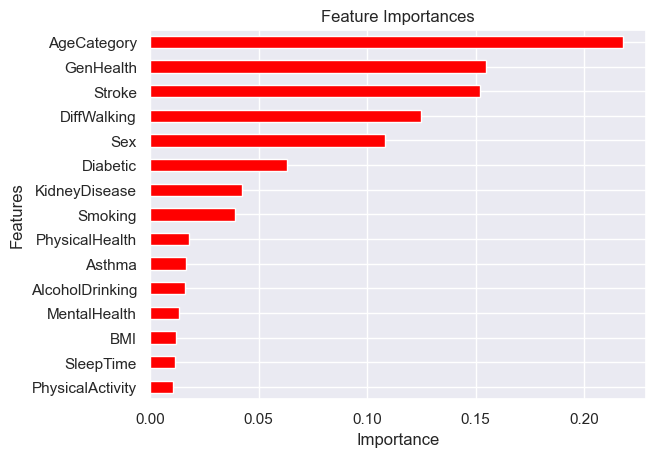

In [125]:
importances = best_model_xg.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=True)
sorted_importances.plot(kind='barh', color='red')

# Display the plot
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()